# 목표
- pandas
- json
- 지도시각화

## 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import json
import folium

cd_ = "C:\Myfolder\KDT\datas"
"datas\crime_in_Seoul.csv"
"datas\police_station_info.json"
"datas\seoul_geo.json"

## 파일 불러오기

In [ ]:
crime = pd.read_csv(cd_ + "/crime_in_Seoul.csv",
                 thousands=",", # 불러올때 모두 숫자로 불러와 준다.
                 index_col="관서명",
                 encoding="cp949")

# 발생과 검거가 같으면 100% 검거라고 할수 있을까??
# display(crime.head())
# display(crime.info())

In [ ]:
crime_occurs = crime.columns[::2] # 발생만 가져오기
crime_arrest = crime.columns[1::2] # 검거만 가져오기

dong_ = [item for item in crime.index if "동" in item]

# crime.loc[dong_]

In [ ]:
# 조건을 이용하여 데이터 추출
crime[(crime["절도 발생"] > crime["절도 발생"].mean()) & (crime["절도 발생"] > 2000)]

# 조건을 이용하여 데이터 추출
crime[(crime["살인 발생"] > 5) | (crime["절도 발생"] > 2000)]

In [ ]:
# 퀴즈: 강도 발생 보다 강도 검거가 많은 데이터를 출추 하세요
crime[crime["강도 발생"] < crime["강도 검거"]][["강도 발생","강도 검거"]]

In [ ]:
crime["total"] = crime.sum(axis=1)

In [ ]:
crime["occurs_tots"] = crime[crime_occurs].sum(axis=1)
crime["arrest_tots"] = crime[crime_arrest].sum(axis=1)
crime.head()

In [ ]:
# json 열기

with open(cd_ + "\police_station_info.json","r",encoding="cp949") as f:
    data_polices = json.load(f)

for i in range(len(data_polices)):
    print(f"""\
경찰서 이름:{data_polices[i]["police_name"]}
경찰서 주소:{data_polices[i]["formatted_address"]}
""")

In [ ]:
police_info_list = []
#주소, 위도, 경도
data_polices[0]["geometry"]
for i in data_polices:
    dict_ = {}
    dict_["police_name"] = i["police_name"]
    dict_["address"] = i["formatted_address"]
    dict_["lat"] = i["geometry"]["location"]["lat"]
    dict_["lng"] = i["geometry"]["location"]["lng"]
    dict_["gu"] = i["formatted_address"].split(" ")[2]

    police_info_list.append(dict_)

police_info_df = pd.DataFrame(police_info_list)
police_info_df.loc[6, "gu"] = "노원구"

In [ ]:
crime

In [ ]:
station_name = []

for name in crime.index:
    station_name.append("서울" + str(name[:-1] + "경찰서"))

crime["police_name"] = station_name
crime

In [ ]:
indexes_from_json = [item.replace("서울","").replace("경찰","") for item in police_info_df["police_name"]]
police_info_df.index = indexes_from_json

fin_plice_info = pd.merge(left=crime,
                          right=police_info_df,
                          how="outer", # inner 시 공통이 없으면 날아감, outer 는 공통이든 뭐든 전부 
                          on=None) # on 은 합칠 컬럼 기준 None, left_on, right_on
fin_plice_info.isnull().sum(axis=1)

fin_plice_info

## 지도 시각화

In [ ]:
import folium
map = folium.Map(location = [37.5642135, 127.0016985],
                     zoom_start = 12)
geo_json = "C:\\Myfolder\\KDT\\datas\\seoul_geo.json"

for i in range(len(fin_plice_info)):
    lat = fin_plice_info.loc[i]["lat"]
    lng = fin_plice_info.loc[i]["lng"]
    police_name = fin_plice_info.loc[i]["police_name"]
    ocucurs_tot = fin_plice_info.loc[i]["occurs_tots"]


    folium.Marker(location=[lat, lng],
                  icon=folium.Icon(color="blue", icon="star"), #색과 아이콘
                  popup=police_name # 팝업 될 텍스트
                  ).add_to(map)

    folium.Circle(location=[lat, lng], #중심점
                  radius=ocucurs_tot/2, # 반경
                  fill=True).add_to(map)
map

In [ ]:
map = folium.Map(location = [37.5642135, 127.0016985],
                     zoom_start = 12)

for _, j in fin_plice_info.iterrows():

    lat = j["lat"]
    lng = j["lng"]
    folium.Marker(location=[lat, lng],
                  icon=folium.Icon(color="red", icon="home"), #색과 아이콘
                  popup=police_name # 팝업 될 텍스트
                  ).add_to(map)
    folium.Circle(location=[lat, lng], #중심점
                  radius=j["arrest_tots"]/2, # 반경
                  color="red",
                  fill=True).add_to(map)
map

In [463]:
# polices_name_list = [police_info_list[i]["police_name"].replace("서울","").replace("경찰서","") for i in range(len(police_info_list))]

# for item in polices_name_list:
#     for item_ in crime.index:
#         if item in item_:
#             print(item,item_)
# crime.index

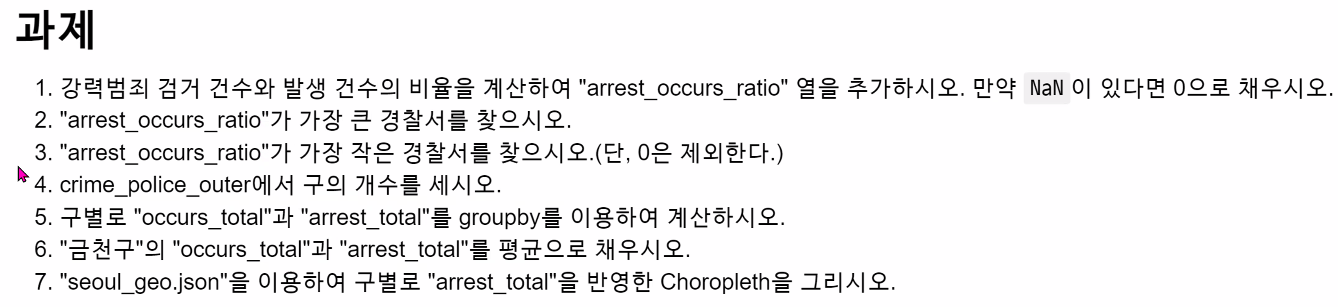

,A,B
0,1.0,NaN
1,2.0,NaN
0,NaN,3.0
1,NaN,4.0
